<center><H1> Machine Learning Lab #5

<H3>  LOGISTIC REGRESSION AND STOCHASTIC GRADIENT DESCENT (SGD)

In [ ]:
#Generic Imports

import math
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from scipy.sparse import csr_matrix
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

<H2>Questions

1. Let’s say we have a fictional dataset of pairs of variables, a mother and her daughter’s heights:
height of mother(x)/daughter (y) pairs.


Create a CSV file for the above training data and write a Python function program to find the fitted linear 
regression with gradient descent technique. Compare the coefficients obtained from the sklearn model with
your program. Compute the log loss, MSE and RMSE. Plot the graph Daughter height (Y-axis) vs Mother 
height (X-axis) with blue colour. Also, plot the line of best fit with red colour. Predict her daughter’s height 
with given a new mother height as 63. Plot the graph of error in y-axis and iteration in x-axis with 4 epochs
(6x4=24 iterations)

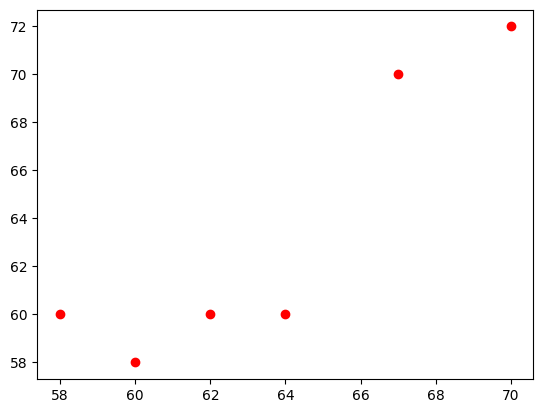

In [ ]:
X = np.array([58,62,60,64,67,70])
Y = np.array([60,60,58,60,70,72])

plt.scatter(X,Y, color='red')
plt.show()  

In [ ]:
m,c,L,epochs = 0, 0, 0.0001, 4
n = float(len(X))
MSE_errors = []
RMSE_errors = []

for i in range(epochs):
    Y_pred = m * X + c
    D_m = (-2 / n) * np.sum(X * (Y - Y_pred))
    D_c = (-2 / n) * np.sum(Y - Y_pred)
    m -= L * D_m
    c -= L * D_c
    error = np.mean((Y - Y_pred) ** 2) #MSE Error being used here
    r_errors = np.sqrt(np.mean((Y - Y_pred) ** 2))
    RMSE_errors.append(r_errors)
    MSE_errors.append(error) #Adding errors to a list

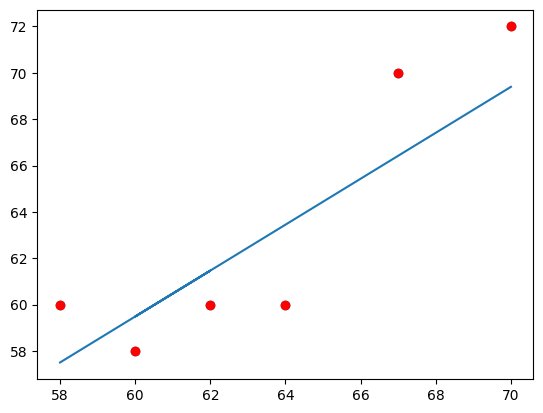

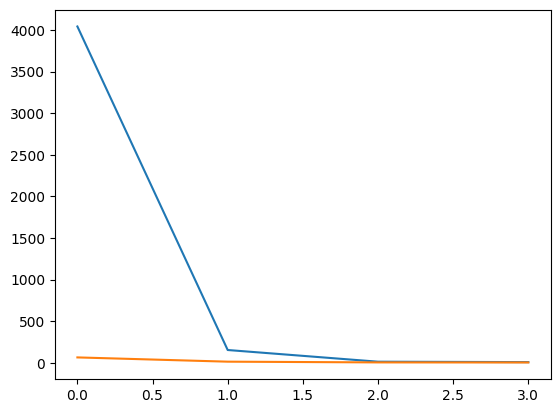

In [28]:
plt.scatter(X, Y)
ypred = m * X + c
plt.plot(X, Y_pred)
plt.scatter(X, Y, color='red')
plt.show()

plt.plot(MSE_errors)
plt.plot(RMSE_errors)
plt.show()

2) Create a CSV file for the above training data and write a Python function program to find the fitted logistic 
regression with gradient descent technique. Compare the coefficients obtained from the sklearn model with 
your program. Compute the predicted y and assign the class label (prediction = 0 IF p(fail) < 0.5 and prediction 
= 1 IF p(pass) >= 0.5) and compute the accuracy. Find the error for each iteration and predict the probability 
that a student will pass the exam if they study for a) 3.5 hours b) 7.5 hours. Plot the graph of error in y-axis 
and iteration in x-axis with 3 epochs (8x3=24 iterations).


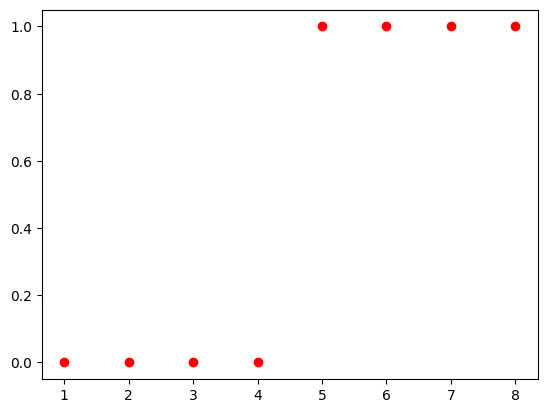

In [29]:
X = np.array([1,2,3,4,5,6,7,8])
Y = np.array([0,0,0,0,1,1,1,1])

plt.scatter(X,Y, color='red')
plt.show()

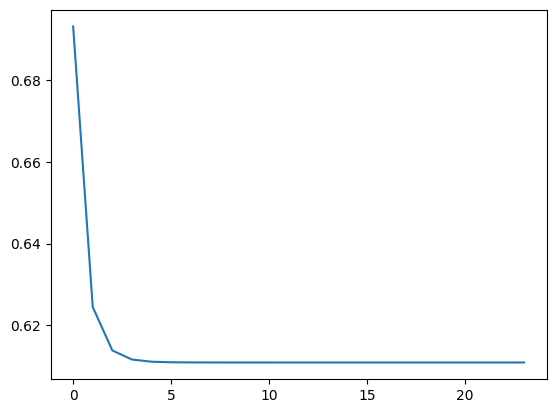

In [52]:
l = 0.1
iters = 24
losses = []
w = 0  

for _ in range(iters):
    yhat = 1 / (1 + np.exp(-X * w))
    grad = np.dot(X, (yhat - Y)) / len(Y)
    w -= l * grad
    loss = -np.mean(Y * np.log(yhat) + (1 - Y) * np.log(1 - yhat))
    losses.append(loss)

plt.plot(losses)
plt.show()

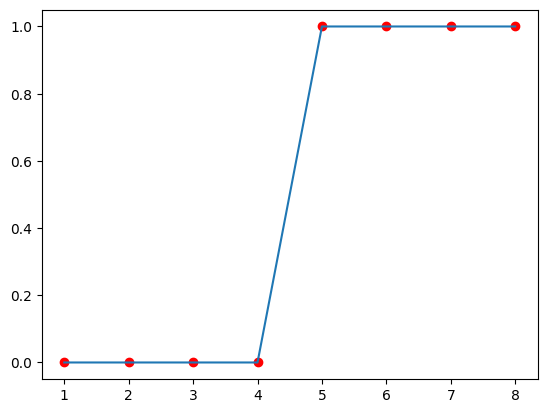

In [53]:
yhat[yhat<0.7] = 0
yhat[yhat>0.7] = 1

plt.plot(X, yhat)
plt.scatter(X,Y, color="red")
plt.show()

3. Consider the above dataset with two independent variables (X1 and X2) and a dependent variable (Y). 
Implement in python, how you can perform the logistic regression to model the relationship between the 
independent variables and the dependent variable.


In [60]:
x1 = np.array([4,2,1,3,1,6])
x2 = np.array([1,8,0,2,4,7])
y = np.array([1, 0, 1, 0, 0, 0])

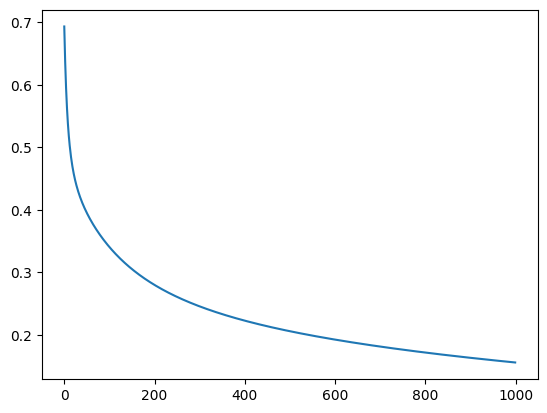

In [63]:
x1 = np.array([4, 2, 1, 3, 1, 6])
x2 = np.array([1, 8, 0, 2, 4, 7])
y = np.array([1, 0, 1, 0, 0, 0])
losses = []

X = np.column_stack((x1, x2))
l = 0.01
iters = 1000

w = np.zeros(X.shape[1] + 1)

for _ in range(iters):
    yhat = 1 / (1 + np.exp(-np.dot(X, w[1:]) - w[0]))
    
    dw = np.dot(X.T, (yhat - y)) / len(y)
    db = np.sum(yhat - y) / len(y)
    
    w[1:] -= l * dw
    w[0] -= l * db

    loss = -np.mean(y * np.log(yhat) + (1 - y) * np.log(1 - yhat))
    losses.append(loss)

plt.plot(losses)
plt.show()

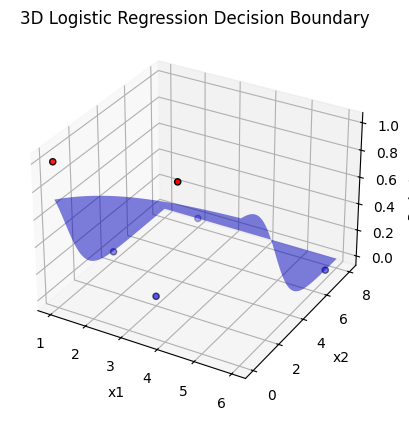

In [64]:
# Prepare data for 3D plot
x1_range = np.linspace(x1.min(), x1.max(), 100)
x2_range = np.linspace(x2.min(), x2.max(), 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
X_grid = np.column_stack((X1.ravel(), X2.ravel()))
yhat_grid = 1 / (1 + np.exp(-np.dot(X_grid, w[1:]) - w[0]))
yhat_grid = yhat_grid.reshape(X1.shape)

# Plotting 3D decision boundary
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c=y, cmap='bwr', edgecolor='k', label='Data')
ax.plot_surface(X1, X2, yhat_grid, color='blue', alpha=0.5, rstride=100, cstride=100)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Probability')
ax.set_title('3D Logistic Regression Decision Boundary')
plt.show()


---